In [1]:
import ciw
import matplotlib.pyplot as plt 
import pandas as pd ,seaborn as sns, numpy as np ,matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import expon, poisson,gamma
import numpy as np
from scipy.stats import ks_2samp, kstest
import statsmodels.api as sm 
warnings.filterwarnings('ignore')
np.random.seed(0)
import matplotlib 
font = {#'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)


ModuleNotFoundError: No module named 'ciw'

# Generating random numbers

### 1. Exponential 

$f(x|\mu) =\frac{1}{\mu} e^{-\frac{1}{\mu} (x-loc)}  \ \ \ \   ,   \ \ \    x \geq 0 $

$\mu$ is the average arrival service rate per specific time period and $1/\mu$ is called scale. 

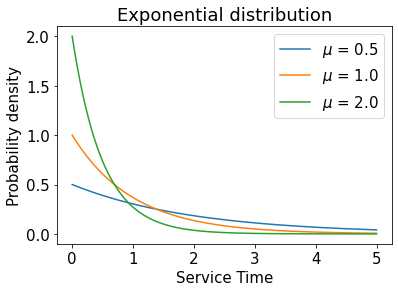

In [ ]:
# Define rate parameters
lambdas = [0.5, 1.0, 2.0]

# Create x-axis values for the plot
x = np.linspace(0, 5, 1000)

# Plot the exponential distributions for each rate parameter
for lam in lambdas:
    y = expon.pdf(x, scale=1/lam)
    z = expon.cdf(x, scale=1/lam)
    plt.plot(x, y, label=r'$\mu$ = {}'.format(lam))

# Add axis labels and legend
plt.xlabel('Service Time')
plt.ylabel('Probability density')
plt.title('Exponential distribution')
plt.legend()
plt.show()


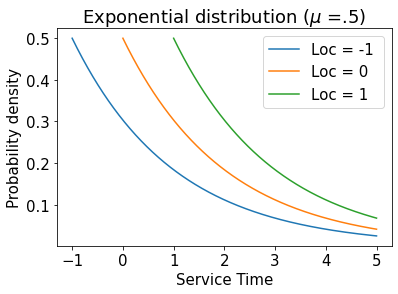

In [ ]:
# Define rate parameters (denominate the lowest possible value for service time - should be valid)
location = [-1,0, 1]

# Create x-axis values for the plot
x = np.linspace(-1, 5, 1000)

# Plot the exponential distributions for each rate parameter
for loc in location:
    y = expon.pdf(np.linspace(loc, 5, 1000), scale=1/.5,  loc= loc )
    z = expon.cdf(np.linspace(loc, 5, 1000), scale=1/.5,  loc=loc )
    plt.plot(np.linspace(loc, 5, 1000), y, label=r'Loc = {} '.format(loc))

# Add axis labels and legend
plt.xlabel('Service Time')
plt.ylabel('Probability density')
plt.title('Exponential distribution ($\mu$ =.5)')
plt.legend()
plt.show()


### Exponential distributions with different shapes

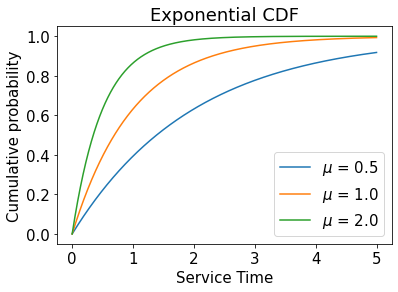

In [ ]:
# Plot the exponential distributions for each rate parameter
x = np.linspace(0, 5, 1000)
for lam in lambdas:
    z = expon.cdf(x, scale=1/lam)
    plt.plot(x, z, label=r'$\mu$ = {}'.format(lam))

# Add axis labels and legend
plt.xlabel('Service Time')
plt.ylabel('Cumulative probability')
plt.title('Exponential CDF')
plt.legend()
plt.show()


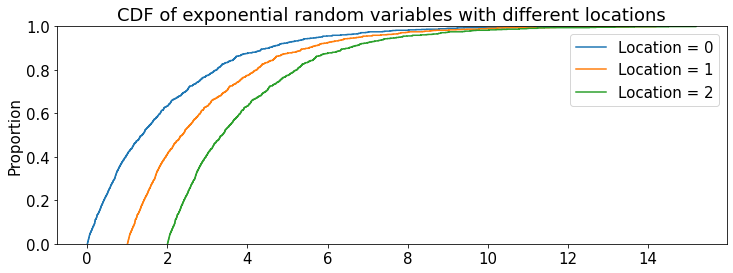

In [ ]:
plt.figure(figsize=(12,4))
sns.ecdfplot(stats.expon.rvs(scale=1/.5 ,loc=0,size=1000, random_state=10))
sns.ecdfplot(stats.expon.rvs(scale=1/.5 ,loc=1,size=1000, random_state=10))
sns.ecdfplot(stats.expon.rvs(scale=1/.5 ,loc=2,size=1000, random_state=10))
plt.legend([r"Location = 0", 
            r"Location = 1", 
            r"Location = 2"])
plt.title('CDF of exponential random variables with different locations')
plt.show()

### 2.  Poisson ($\lambda$)

$P(x|\lambda) =\frac{1}{x!} e^{-\lambda} \lambda ^x      \ \ \ \   ,   \ \ \    x =0 , 1, 2, 3$


$\lambda$ is the average arrival rate per specific time period. 

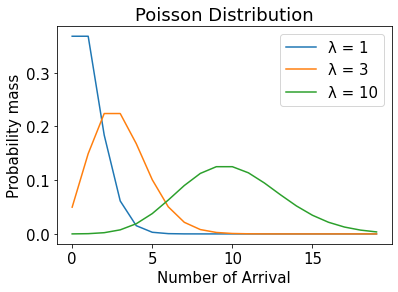

In [ ]:
# Define the x-axis range
x = np.arange(0, 20)

# Set the rate parameters for the Poisson distribution
rate_params = [1,  3,10]

# Plot the PMF for each rate parameter
for rate_param in rate_params:
    # Calculate the corresponding Poisson PMF
    pmf = poisson.pmf(x, mu=rate_param)

    # Plot the PMF
    plt.plot(x, pmf, label=f'λ = {rate_param}')

# Add plot labels and legend
plt.xlabel('Number of Arrival')
plt.ylabel('Probability mass')
plt.title('Poisson Distribution')
plt.legend()

# Show the plot
plt.show()

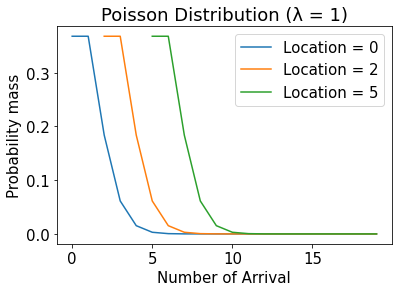

In [ ]:
# Set the rate parameters for the Poisson distribution
loc_params = [0,  2, 5]

# Plot the PMF for each rate parameter
for loc in loc_params:
    x = np.arange(loc, 20)
    
    # Calculate the corresponding Poisson PMF
    pmf = poisson.pmf(x, loc=loc, mu=1)

    # Plot the PMF
    plt.plot(x, pmf, label=f'Location = {loc}')

# Add plot labels and legend
plt.xlabel('Number of Arrival')
plt.ylabel('Probability mass')
plt.title('Poisson Distribution (λ = 1)')
plt.legend()

# Show the plot
plt.show()

### 3. Gamma ($\alpha$, $\beta$) 

$f(x;\alpha,\beta) = \frac{1}{(\alpha-1)!\beta^\alpha}  e^{-x/ \beta} x^{\alpha -1} ,  \ \ \  \  x\geq 0 $ 

$\alpha$, $\beta$ are called shape and rate paramters. 

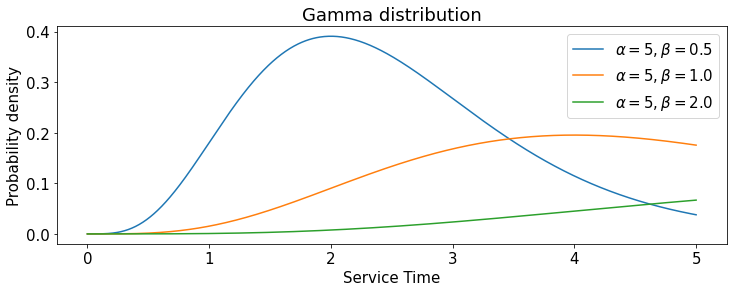

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, gamma

k = 5
theta_values = [0.5, 1.0, 2.0]

x = np.linspace(0, 5, 1000)

plt.figure(figsize=(12,4))   
for theta in theta_values:
    y = gamma.pdf(x, a=k, scale=theta)
    plt.plot(x, y, label=r"$\alpha = {}, \beta = {}$".format(k, theta))

plt.xlabel('Service Time')
plt.ylabel('Probability density')
plt.title('Gamma distribution')
plt.legend()
plt.show()

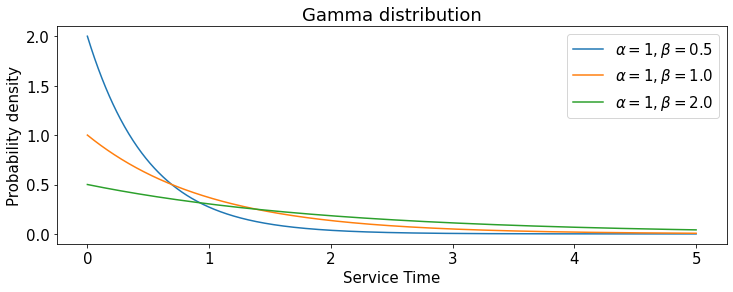

In [ ]:
k = 1
theta_values = [0.5, 1.0, 2.0]

x = np.linspace(0, 5, 1000)

plt.figure(figsize=(12,4))   
for theta in theta_values:
    y = gamma.pdf(x, a=k, scale=theta)
    plt.plot(x, y, label=r"$\alpha = {}, \beta = {}$".format(k, theta))

plt.xlabel('Service Time')
plt.ylabel('Probability density')
plt.title('Gamma distribution')
plt.legend()
plt.show()

# Parameter Estiamtion of Probability distribution (MLE) 

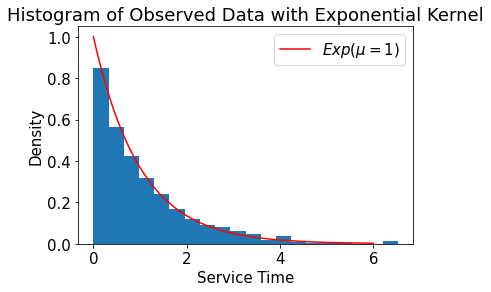

In [ ]:
# generating random variables from exponential distribution
# Generate 1000 random numbers from an exponential distribution
exp = expon.rvs(size=1000,scale = 1)

# Create a histogram with 20 bins and a density estimate
n, bins, patches = plt.hist(exp, bins=20, density=True)

# Create an exponential kernel density estimate
kde = expon.pdf

# Evaluate the KDE on a grid of x-values
xvals = np.linspace(0, 6, 200)
yvals = kde(xvals)

# Plot the KDE as a smooth line on top of the histogram
plt.plot(xvals, yvals, 'r-', label=r"$ Exp (\mu =1 )$")

# Set axis labels and title
plt.xlabel('Service Time')
plt.ylabel('Density')
plt.title('Histogram of Observed Data with Exponential Kernel')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
## MLE for exponential distribution
loc_est,scale_est=stats.expon.fit(exp) 
print('Location and Scale of exponential distribution is: ', loc_est, scale_est)

Location and Scale of exponential distribution is:  0.0003674112387015788 1.0656836166843187


In [ ]:
# generating random varialbes from gamma distribution
𝛼 =2
𝛽 = 10
gamm_1 = stats.gamma.rvs(a=𝛼 , loc =0 , scale  =1/𝛽, size= 1000, random_state=10)

In [ ]:
## MLE for gamma distribution
shape_gama,loc_gama ,scale_gama = stats.gamma.fit(gamm_1) 
print('Location, shape, and Scale of gamma distribution is: ', loc_gama, shape_gama,scale_gama)

Location, shape, and Scale of gamma distribution is:  -0.001703346910082787 2.1271991039232034 0.09145845914572293


In [ ]:
# for gamma
stat, p_value = stats.kstest(gamm_1,"gamma",args=(shape_gama,loc_gama ,scale_gama)) #KS Test (Kolmogorov–Smirnov test)
if p_value<.05:
    print ('p-value is:', p_value.round(2), 'Reject H0')
else:
    print('p-value is:', p_value.round(2), 'Fail to reject H0')

p-value is: 0.86 Fail to reject H0


<Figure size 432x288 with 0 Axes>

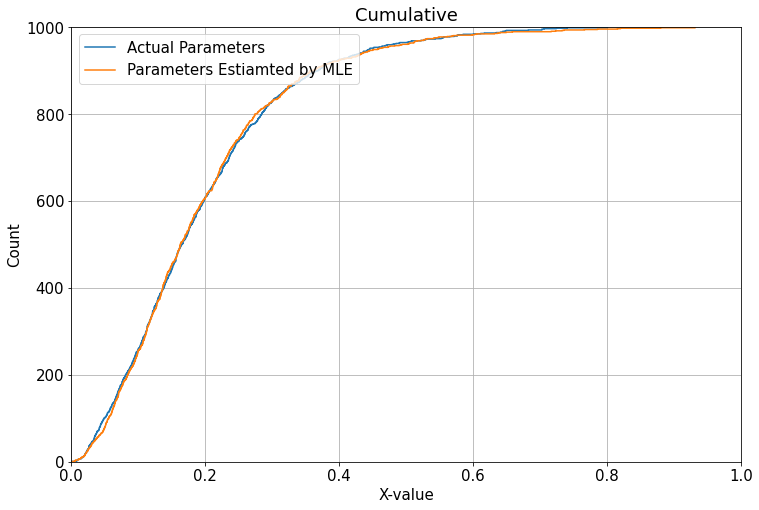

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil, floor, sqrt

# Drawing sample date poi
##################################################

# Random Gaussian data (mean=0, stdev=5)
data1 = gamm_1
data2 = stats.gamma.rvs(a=shape_gama , loc =loc_gama , scale  =scale_gama, size= 1000, random_state=30)
data1.sort(), data2.sort()

min_val = floor(min(data1+data2))
max_val = ceil(max(data1+data2))

##################################################

fig = plt.gcf()
plt.figure(figsize=(12,8))

# Cumulative distributions, stepwise:
plt.step(np.concatenate([data1, data1[[-1]]]), np.arange(data1.size+1), label='Actual Parameters')
plt.step(np.concatenate([data2, data2[[-1]]]), np.arange(data2.size+1), label='Parameters Estiamted by MLE') 

plt.title('Cumulative')
plt.ylabel('Count')
plt.xlabel('X-value')
plt.legend(loc='upper left')
plt.xlim([0, 1])
plt.ylim([0, data1.size+1])
plt.grid()


In [ ]:
import math 

##### x! ##########
def factorial(x):
    if (x == 1) or (x==0):
        return 1
    else:
        # recursive call to the function
        return (x * factorial(x-1)) 

###################
def user_defined_sum(c,𝜌):
    sum = 0
    for n in range(c):
        sum += (c*𝜌)**n/factorial(n) 

    return 1/(sum + (c*𝜌)**c/(factorial(c)*(1-𝜌)))

##### M/M/c ##########
def m_m_c(𝜆,µ,c):
    𝜌 = 𝜆/(c*µ)
    p0 = user_defined_sum(c,𝜌)
    lq = (c*𝜌)**c*p0*𝜌/(factorial(c)*(1-𝜌)**2)
    wq = lq/𝜆
    L = lq + 𝜆/µ
    W=L/𝜆
    return(𝜌,p0,lq,wq,L,W) 

# Starbucks Example: Two M/M/1

## Discrete Event Simulation 

In [ ]:
l = (95/2) # arrival rate to each server /hour
mu = 50 # service rate  per server /hour
c = 1
decimal = 4
# (1117, 18) hour 
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=l)],
    service_distributions=[ciw.dists.Exponential(rate=mu)],
    number_of_servers=[1])
ciw.seed(0)


Q = ciw.Simulation(N, tracker=ciw.trackers.SystemPopulation())

# Stopping Criteria
Q.simulate_until_max_customers(100000)
#Q.simulate_until_max_time(10000)

recs = Q.get_all_records()
df = pd.DataFrame(recs)
df.sort_values(by='arrival_date',inplace=True)
# Inter_arrival and System_time is not in the "get_all_records", we need to calculate them ourselves.
df['inter_arrival'] = df.arrival_date - df.arrival_date.shift(1,fill_value=0)
df['system_time'] = df.exit_date - df.arrival_date
df.shape
df[['id_number','server_id','arrival_date','waiting_time','service_start_date','server_id','service_time','service_end_date','exit_date','queue_size_at_arrival','queue_size_at_departure']]


,id_number,server_id,arrival_date,waiting_time,service_start_date,server_id,service_time,service_end_date,exit_date,queue_size_at_arrival,queue_size_at_departure
0,1,1,0.039171,0.000000,0.039171,1,0.028373,0.067543,0.067543,0,2
1,2,1,0.050659,0.016884,0.067543,1,0.010382,0.077925,0.077925,1,2
2,3,1,0.056968,0.020957,0.077925,1,0.007228,0.085153,0.085153,2,1
3,4,1,0.072040,0.013113,0.085153,1,0.012948,0.098101,0.098101,2,0
4,5,1,0.104283,0.000000,0.104283,1,0.017512,0.121795,0.121795,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,1,2100.369318,0.285722,2100.655039,1,0.089006,2100.744045,2100.744045,18,16
99996,99997,1,2100.451741,0.292305,2100.744045,1,0.025572,2100.769617,2100.769617,12,16
99997,99998,1,2100.451861,0.317757,2100.769617,1,0.025638,2100.795255,2100.795255,13,15
99998,99999,1,2100.488760,0.306495,2100.795255,1,0.042907,2100.838163,2100.838163,11,17


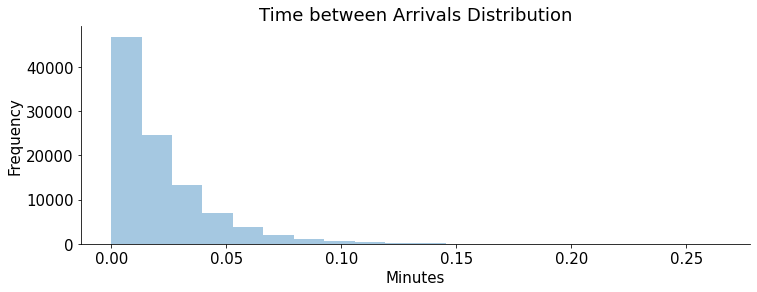

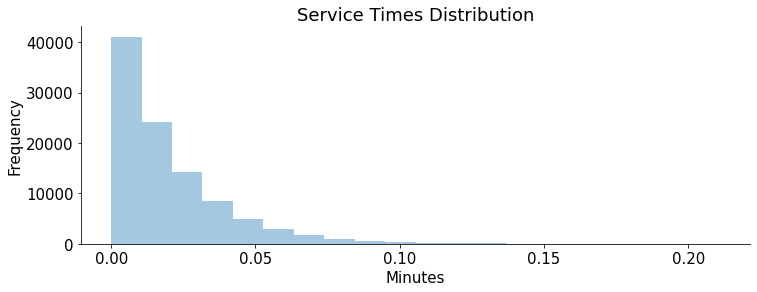

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df['inter_arrival'],kde=False,bins=20)
plt.title('Time between Arrivals Distribution')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

plt.figure(figsize=(12,4))
sns.distplot(df['service_time'],kde=False,bins=20)
plt.title('Service Times Distribution')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()


#  Performance Measure of M/M/1 System

In [ ]:
print('Avg. Time in queue:{}'.format(round(df['waiting_time'].mean(),3)))
print('Avg. Time in system:{}'.format(round(df['system_time'].mean(),3)))

Avg. Time in queue:0.374
Avg. Time in system:0.394


# Comparing with Steady State Analytic's Solution 

In [ ]:
𝜆 = 95/2  #arrival rate
µ = 50    # service rate 

𝜌,p0,lq,wq,L,W = m_m_c(𝜆,µ,c=1)  
print('Avg. Time in queue:{}'.format(round(wq,3)))
print('Avg. Time in system:{}'.format(round(W,3)))

# we will find that this analytic solution will be very similar to the simulated result as above.

Avg. Time in queue:0.38
Avg. Time in system:0.4


# How Identify Minimum Simulation Time to Reach Steady State?

In [ ]:
l = 95/2 
mu = 50 
c = 1
decimal = 4

N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=l)],
    service_distributions=[ciw.dists.Exponential(rate=mu)],
    number_of_servers=[1])
ciw.seed(0)
Q = ciw.Simulation(N, tracker=ciw.trackers.SystemPopulation())
avg_wait_time_sim=[]


### running for different max time
for time in np.arange(1, 100,5)*24:
    Q.simulate_until_max_time(time)
    recs = Q.get_all_records()
    df = pd.DataFrame(recs)
    avg_wait_time = df['waiting_time'].mean()
    avg_wait_time_sim.append(avg_wait_time)
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


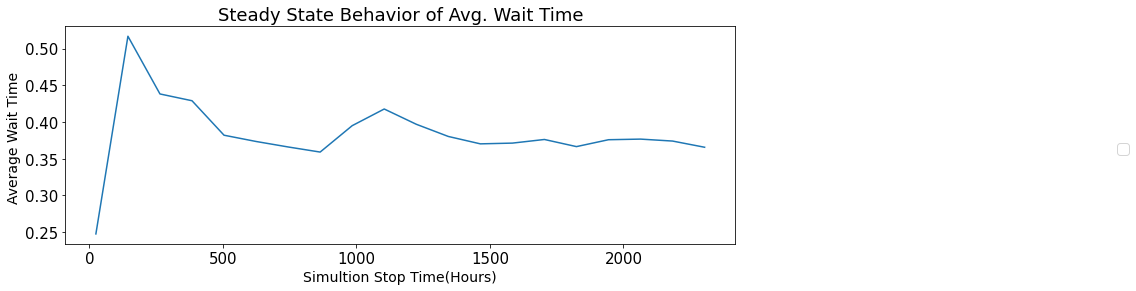

In [ ]:
fig,ax = plt.subplots(figsize=(12,4))
ax.plot(np.arange(1, 100,5)*24, avg_wait_time_sim)
ax.set_ylabel("Average Wait Time ", fontsize=14)
ax.set_xlabel("Simultion Stop Time(Hours)", fontsize=14)
plt.legend(bbox_to_anchor=(1.6, .5))

plt.title('Steady State Behavior of Avg. Wait Time')
plt.show() 

# Running Simulation with Minimum simulate_until_max_time = 500

In [ ]:
# Setting max time at 500 hour where steady state behavor has reached
N = ciw.create_network(
    arrival_distributions=[ciw.dists.Exponential(rate=l)],
    service_distributions=[ciw.dists.Exponential(rate=mu)],
    number_of_servers=[1])

ciw.seed(0)
Q = ciw.Simulation(N, tracker=ciw.trackers.SystemPopulation())
avg_wait_time_sim=[]
Q.simulate_until_max_time(2000)
warmup = 500


recs = Q.get_all_records()
df = pd.DataFrame(recs)
df.sort_values(by='arrival_date',inplace=True)
df_steady_state = df.loc[df['arrival_date']>warmup]

In [ ]:
df_steady_state['system_time'] = df_steady_state.exit_date - df_steady_state.arrival_date
df_steady_state['inter_arrival'] = df_steady_state.arrival_date - df_steady_state.arrival_date.shift(1,fill_value=0)

In [ ]:
avg_system_time = df_steady_state['system_time'].mean()
avg_wait_time = df_steady_state['waiting_time'].mean()
avg_queue_size = df_steady_state['queue_size_at_arrival'].mean()
P_0 = df_steady_state[df_steady_state['waiting_time']==0].shape[0]/df_steady_state.shape[0]

print('Output:','\n',
     'Expected wait time in line (Wq):',str(round(avg_wait_time,decimal)),'\n',
     'Expected time spent on the system (Ws):',str(round(avg_system_time,decimal)),'\n',
     'Expected number of customers in line (Lq):',str(round(avg_queue_size,decimal)),'\n',
     'Probability that there is no customer (P0):',str(round(P_0,decimal)),'\n'
)

Output: 
 Expected wait time in line (Wq): 0.3771 
 Expected time spent on the system (Ws): 0.3971 
 Expected number of customers in line (Lq): 18.8933 
 Probability that there is no customer (P0): 0.0471 



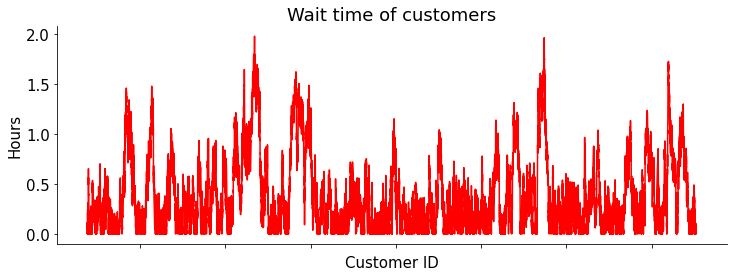

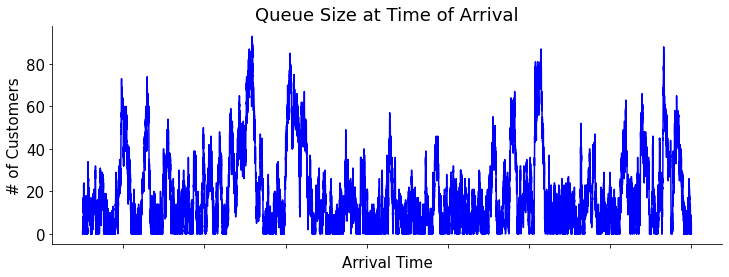

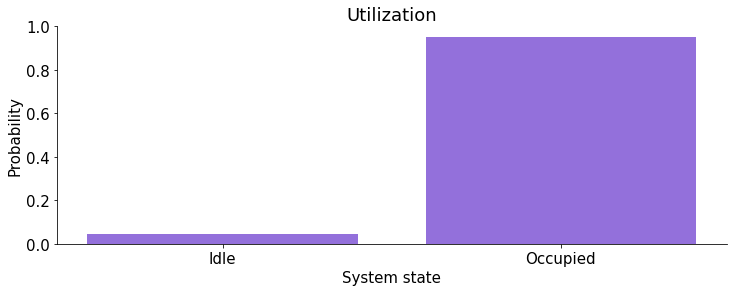

In [ ]:
plt.figure(figsize=(12,4))
sns.lineplot(x=df_steady_state['id_number'],y=df_steady_state['waiting_time'],color='red').set(xticklabels=[])
plt.xlabel('Customer ID')
plt.ylabel('Hours')
plt.title('Wait time of customers')
sns.despine()
plt.show()

plt.figure(figsize=(12,4))
sns.lineplot(x=df_steady_state['arrival_date'],y=df_steady_state['queue_size_at_arrival'],color='blue').set(xticklabels=[])
plt.xlabel('Arrival Time')
plt.ylabel('# of Customers')
plt.title('Queue Size at Time of Arrival')
sns.despine()
plt.show()


plt.figure(figsize=(12,4))
plt.bar(['Idle','Occupied'],[P_0,1-P_0],color='mediumpurple')
plt.title('Utilization')
plt.xlabel('System state')
plt.ylabel('Probability')
sns.despine()
plt.show()

# It is necessary to perform simulations multiple times with different ciw.seed() and assess their performance.